# 🌸 Análise preditiva para prever o diagnóstico de câncer de mama  🌸

De Ihan Messias

1. Identificando o problema:

    O câncer de mama é a forma mais comum de câncer em mulheres nos Estados Unidos, representando quase um terço de todos os diagnósticos. Além disso, é a segunda principal causa de morte relacionada ao câncer entre as mulheres. Esta condição surge devido ao crescimento anormal de células no tecido mamário, formando tumores que podem variar de benignos a malignos. O diagnóstico é feito por meio de diversos exames, como mamografia, ressonância magnética, ultrassom e biópsia.

2. Objetivo:
    
    O problema se enquadra em duas categorias: 
    - 1 = Maligno (canceroso) - Detectado
    - 0 = Benigno (não canceroso) - Ausente
    
    `No contexto do aprendizado de máquina, isso representa um problema de classificação.`

    > Dessa forma, nosso objetivo é classificar se um câncer de mama é benigno ou maligno, além de prever a recorrência ou não de casos malignos após um determinado período. Para alcançar esse objetivo, aplicamos métodos de classificação de aprendizado de máquina para ajustar uma função capaz de prever a classe discreta de novos dados de entrada.

3. Localização dos Dados:
    
    Os conjuntos de dados relacionados ao câncer de mama estão disponíveis em um repositório de aprendizado de máquina mantido pela Universidade da Califórnia, Irvine. Este conjunto de dados é composto por 569 amostras de células tumorais.

    <a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data" target="_blank">Clique aqui</a> para baixar os dados

## Analisando dados

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# inserting dataframe
df = pd.read_csv('./data.csv')

In [3]:
# capture dimention
l,c = df.shape
print(f'linhas: {l} | colunas: {c}')

linhas: 569 | colunas: 33


In [4]:
# checking missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# remove columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Observação
1. Contagem (count): O número de observações não nulas em cada coluna.
2. Média (mean): A média aritmética dos valores na coluna.
3. Desvio padrão (std): Uma medida de dispersão dos valores em relação à média.
4. Valor mínimo (min): O menor valor na coluna.
5. 25º percentil (25%): O valor que separa os 25% menores valores do restante.
6. 50º percentil (50%) ou mediana: O valor que separa os 50% menores valores do restante (também conhecido como mediana).
7. 75º percentil (75%): O valor que separa os 75% menores valores do restante.
8. Valor máximo (max): O maior valor na coluna.

In [7]:
# check diagnostic values
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
# diagnostic values
fig = px.bar(
    df['diagnosis'].value_counts().reset_index(),x='diagnosis',
    y='count', title='Contagem de M e B', color='diagnosis',
    color_discrete_sequence=['LightSeaGreen','lightcoral'],
    labels={'diagnosis': 'Diagnóstico', 'count': 'Contagem'},)
fig.update_yaxes(showgrid=False)
fig.update_xaxes(title_text='', categoryorder='total ascending')
fig.update_traces(hovertemplate='Contagem: %{y}')
fig.update_layout(width=600, height=400)

In [9]:
# binary classification
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [28]:
# check correlation values
fig = px.imshow(df.corr().round(1), text_auto=True,
            labels=dict(color="Correlation"),
            aspect='auto')
fig.update_xaxes(tickangle=270)
fig.update_layout(width=1200,height=900)

In [11]:
# removing redundant warnings
import warnings
warnings.filterwarnings('ignore')

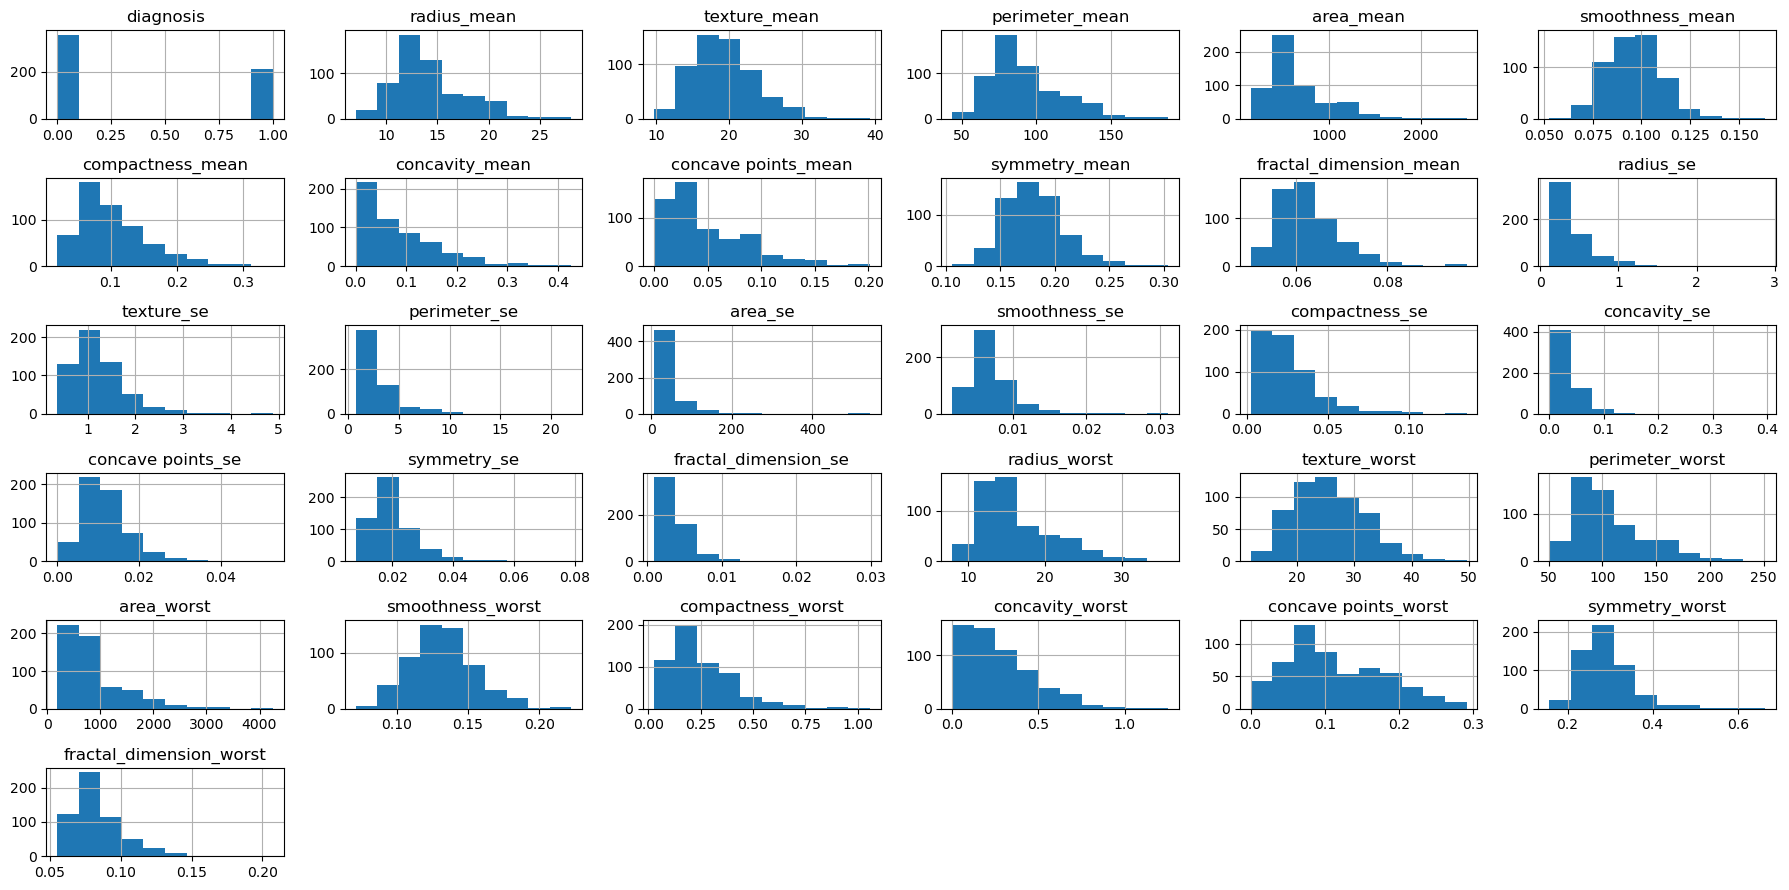

In [12]:
# plotting histograms
fig, ax = plt.subplots(figsize=(18, 9))
df.hist(ax=ax) 
plt.tight_layout()

## Pré-processamento dos dados

- Codificação das variáveis categóricas
- Divisão dos dados em conjutos de treino e teste

In [13]:
# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# dataset split
X = df.drop(columns=['diagnosis']) # dataset independent variables (M,B)
y = df['diagnosis']  # Target data (what we want to predict)
# training and testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Construção e Treinamento do Modelo

In [15]:
# Train the model with the training data
'''[RandomForestClassifier]:
Ele cria uma "floresta" de árvores de decisão e usa a média das previsões das árvores individuais para fazer previsões finais.

clt ->> Classifier
ramdom_state=42 ->> Garante o que o modelo seja treinado de maneira consistente em diferentes execuções (Obtém os mesmos resultados sempre que treinar o modelo.)
A escolha do número 42 como valor para random_state ou qualquer outro número inteiro não tem um significado especial do ponto de vista da funcionalidade do algoritmo RandomForestClassifier. O valor exato escolhido para random_state não importa, contanto que seja um número inteiro. O importante é que ele seja fixo para garantir que os resultados do modelo sejam reproduzíveis em diferentes execuções do código.
Em programação e na comunidade de desenvolvedores, o número 42 é algumas vezes usado como uma "Resposta para a Vida, o Universo e Tudo" em uma piada popular do livro "O Guia do Mochileiro das Galáxias" de Douglas Adams. No contexto da pergunta "qual é a resposta para a vida, o universo e tudo mais?", a resposta foi calculada por um supercomputador como sendo o número 42, embora o significado exato disso seja um mistério, conforme a narrativa do livro.
'''
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Avaliação do Modelo

In [16]:
# Running the model
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Observação:
#### Acurácia
Ela representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Em outras palavras, a acurácia mede a precisão global do modelo.

A fórmula para calcular a acurácia é:

[![accurary](https://github.com/ihanmessias/machine_learn/assets/72288211/9eeff0bf-0031-416e-852c-75b0001fde4a)](https://github.com/ihanmessias/machine_learn/assets/72288211/9eeff0bf-0031-416e-852c-75b0001fde4a)

#### Classificação

- __*Precision (Precisão):*__ É a porcentagem de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Quanto mais alta, menos falsos positivos o modelo tem.

- __*Recall (Sensibilidade):*__ É a porcentagem de instâncias positivas reais que o modelo conseguiu capturar corretamente. Quanto mais alta, menos falsos negativos o modelo tem.

- __*F1-Score:*__ É uma média equilibrada entre precisão e recall. É útil quando você quer uma métrica única que leve em consideração tanto falsos positivos quanto falsos negativos.

In [17]:
print("Relatório de Clf:\n", classification_report(y_test, predictions))

Relatório de Clf:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Matrix de Confusão

In [18]:
fig = px.imshow(confusion_matrix(y_test, predictions), text_auto=True,
                labels=dict(x="Previsto", y="Real"),
                x=['B', 'M'],
                y=['B', 'M'],
                color_continuous_scale='mint')
fig.update_traces(hovertemplate='Previsto: %{x}<br>Real: %{y}<br>Contagem: %{z}')
fig.update_layout(title='Matriz de Confusão', xaxis_title='Previsto', yaxis_title='Real')
fig.update_layout(width=800,height=500)